# NGC 4858

NGC 4858 is located in the Coma cluster, close to the elliptical NGC 4860. This galaxy exhibits a peculiar morphology, characterized by its disrupted appearance and signs of active star formation. With a moderately high star-formation rate, NGC 4858 showcases numerous bright HII regions embedded within a distorted disk, likely influenced by its interaction with the surrounding intracluster medium (ICM). The tidal features and extended ionized gas tails suggest that NGC 4858 is undergoing ram-pressure stripping, a process that can trigger star formation while simultaneously removing gas from the galaxy.

<img src="images/NGC4858.png" width="500"/>

In [3]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

# Open the FITS file and load data
with fits.open("DATA/NGC_4858/NGC4858.fits") as hdul:
    hdul.info()  # Shows a summary of the FITS file

    print('\n')
    header_0 = hdul[0].header
    for card in header_0.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")  
    
    print('\n')
    header_1 = hdul[1].header
    for card in header_1.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")

    print('\n')
    header_2 = hdul[2].header
    for card in header_2.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")
        
    # Load data
    cube = hdul[1].data 
    var = hdul[2].data 

# Generate the wavelength array
channels = np.arange(0, header_1['NAXIS3'], 1)
w = header_1['CRVAL3'] + channels * header_1['CD3_3']   # wavelength in angstrom

cube_units = 1e-20
var_units = 1e-40

wcs_dict = {
    'CTYPE1': 'RA---TAN', 'CUNIT1': 'deg', 'CRVAL1': 194.756621, 
    "CRPIX1": 222.158385614081, "CD1_1": -5.5555555555556e-05, "CD1_2": 0.0,
    "CTYPE2": "DEC--TAN", "CUNIT2": "deg", "CRVAL2": 28.12035, 
    "CRPIX2": 213.129823776981, "CD2_1": 0.0, "CD2_2": 5.5555555555556e-05,
}

# In this case the tangential projection gives just a small correction, because the FOV is small
wcs = WCS(wcs_dict)

naxis1, naxis2 = header_1['NAXIS1'], header_1['NAXIS2']

ra_min, dec_min = wcs.all_pix2world([[0, 0]], 0)[0]
ra_max, dec_max = wcs.all_pix2world([[naxis1, naxis2]], 0)[0]

Filename: DATA/NGC_4858/NGC4858.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1509   ()      
  1  DATA          1 ImageHDU        51   (432, 433, 3681)   float32   
  2  STAT          1 ImageHDU        43   (432, 433, 3681)   float32   


SIMPLE   = True / file does conform to FITS standard
BITPIX   = 8 / number of bits per data pixel
NAXIS    = 0 / number of data axes
EXTEND   = True / FITS dataset may contain extensions
COMMENT  =   FITS (Flexible Image Transport System) format is defined in 'Astronomy / 
COMMENT  =   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H / 
DATE     = 2024-02-16T16:22:02 / file creation date (YYYY-MM-DDThh:mm:ss UT)
ORIGIN   = ESO-PARANAL / European Southern Observatory
TELESCOP = ESO-VLT-U4 / ESO <TEL>
INSTRUME = MUSE / Instrument used.
RA       = 194.756621 / [deg] 12:59:01.5 RA (J2000) pointing
DEC      = 28.12035 / [deg] 28:07:13.2 DEC (J2000) pointing
EQUINOX  = 2000.0 / St

In [4]:
print(ra_min,ra_max)
print(dec_min,dec_max)

194.77055046736717 194.74333834551476
28.108564306290965 28.132619924965475


In [15]:

# Sum of spectra along spatial axes, resulting in a 1D spectrum
summed_spectra = np.nansum(cube, axis=(1, 2))


In [16]:
summed_var = np.nansum(var, axis=(1,2))

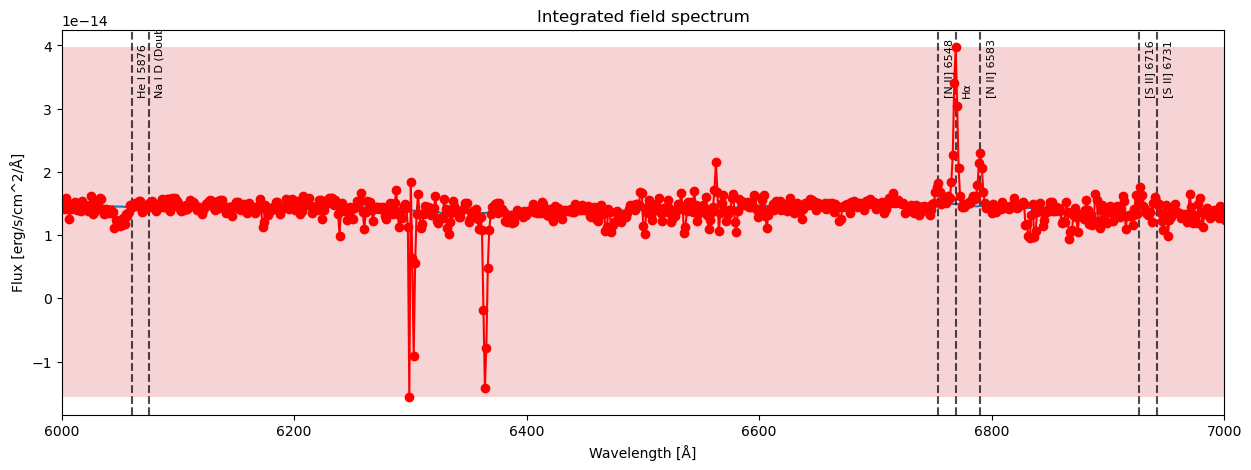

In [25]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,5))
plt.title("Integrated field spectrum")

plt.errorbar(w, summed_spectra*cube_units, yerr=np.sqrt(summed_var*var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5,linestyle='-')

from scipy.ndimage import median_filter
continuum = median_filter(summed_spectra, size=101,mode="nearest")  # Choose an odd kernel size
plt.plot(w,continuum*cube_units)

plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [erg/s/cm^2/Å]")

# Define UBVRI filter wavelength ranges (in Angstrom)
filters = {
    "U": (3200, 4000),
    "B": (4000, 5000),
    "V": (5000, 6000),
    "R": (6000, 7000),
    "I": (7000, 9000),
}

min = np.min(summed_spectra*cube_units)
max = np.max(summed_spectra*cube_units)
# Add vertical shaded regions corresponding to the filters
for name, (wmin, wmax) in filters.items():
    plt.fill_betweenx([min, max], wmin, wmax, alpha=0.2, label=f"{name} filter")
    
z = 0.03141

# Define important emission/absorption lines in galaxies
# Define important emission/absorption lines in galaxies
spectral_lines = {
    # Optical Lines
    "O II (Doublet)": 3727,
    "Hγ": 4340,
    "Hδ": 4102,
    "Hβ": 4861,
    "[O III] 4959": 4959,
    "[O III] 5007": 5007,
    "He II 4686": 4686,
    "He I 4471": 4471,
    "He I 5876": 5876,
    "Hα": 6563,
    "[N II] 6548": 6548,
    "[N II] 6583": 6583,
    "[S II] 6716": 6716,
    "[S II] 6731": 6731,
    "[Ar III] 7136": 7136,
    "[Fe II] 5159": 5159,

    # Calcium Lines
    "[Ca II] 8498": 8498,
    "[Ca II] 8542": 8542,
    "[Ca II] 8662": 8662,
    "Ca H": 3968,
    "Ca K": 3934,

    # Magnesium and Sodium Lines
    "Mg I 5175": 5175,
    "Na I D (Doublet)": 5890,  # Doublet at 5890 and 5896 Å
}
# Apply redshift correction to each spectral line
redshifted_lines = {name: wavelength * (1 + z) for name, wavelength in spectral_lines.items()}

# Add vertical dashed lines for spectral features
for name, wavelength in redshifted_lines.items():
    plt.axvline(wavelength, color="black", linestyle="dashed", alpha=0.7)
    plt.text(wavelength + 5, max * 0.8, name, 
             rotation=90, verticalalignment="bottom", fontsize=8, zorder=1, clip_on=True)

#plt.xlim(4750.15,7500)
#plt.xlim(6740,6760)
plt.xlim(6000,7000)



plt.show()


In [5]:
crval3 = header_1['CRVAL3']
dw = header_1['CD3_3'] 
Ha_channel_inf = int((6765 - crval3)/dw)
Ha_channel_sup = int((6775 - crval3)/dw)
continuum_channel_inf = int((6740 - crval3)/dw)
continuum_channel_sup = int((6750 - crval3)/dw)


units = 1e-20 * 50 / ( 5.55555555555556e-05 * 3600 )**2   # integrating on wavelength, per arcsec^2

integrated_Ha_continuum = np.nansum(cube[Ha_channel_inf:Ha_channel_sup, :, :],axis=0) * units
integrated_continuum_near_Ha = np.nansum(cube[continuum_channel_inf:continuum_channel_sup, :, :], axis=0) * units

integrated_Ha = integrated_Ha_continuum - integrated_continuum_near_Ha


In [7]:
# Create regions

import matplotlib.path as mpath

# Ellipses
center = (194.758633, 28.115619)  # Center of the galaxy (reference coordinates)
angle = + 25                      # Angle of tilt in degrees

x = np.linspace(ra_min,ra_max,integrated_Ha.shape[1])
m_semimajor_axis = np.tan(np.radians(angle))
y_semi =  m_semimajor_axis * (x - center[0]) + center[1]

e = np.sqrt(1-0.9**2)
width = 0.0023333333333333353
n = 3

# Generate the coordinate grid
y_coords, x_coords = np.meshgrid(np.linspace(dec_min, dec_max, integrated_Ha.shape[0]),
                                 np.linspace(ra_min, ra_max, integrated_Ha.shape[1]),
                                 indexing='ij')

down_mask = (y_coords < y_semi)

points = np.vstack((x_coords.ravel(), y_coords.ravel())).T

masks = []

for i in range(1, n):

    mask = np.zeros_like(integrated_Ha, dtype=bool)
    
    # external ellipse
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   

    # Generate ellipse vertices
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)
    cos_angle, sin_angle = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    x_rot = ellipse_x * cos_angle - ellipse_y * sin_angle
    y_rot = ellipse_x * sin_angle + ellipse_y * cos_angle
    vertices_ext = np.column_stack([x_rot + center[0], y_rot + center[1]])

    # internal ellipse
    a = width * (i-1)                # semimajor axis
    b = a * np.sqrt(1-e**2)   

    # Generate ellipse vertices
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)
    cos_angle, sin_angle = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    x_rot = ellipse_x * cos_angle - ellipse_y * sin_angle
    y_rot = ellipse_x * sin_angle + ellipse_y * cos_angle
    vertices_int = np.column_stack([x_rot + center[0], y_rot + center[1]])

    # Create paths for the ellipses
    path_ext = mpath.Path(vertices_ext)
    path_int = mpath.Path(vertices_int)

    # Mask points within the external but outside the internal ellipse
    mask_ext = path_ext.contains_points(points).reshape(mask.shape)
    mask_int = path_int.contains_points(points).reshape(mask.shape)
    
    mask |= (mask_ext & ~mask_int & down_mask)
    
    masks.append(mask)
    

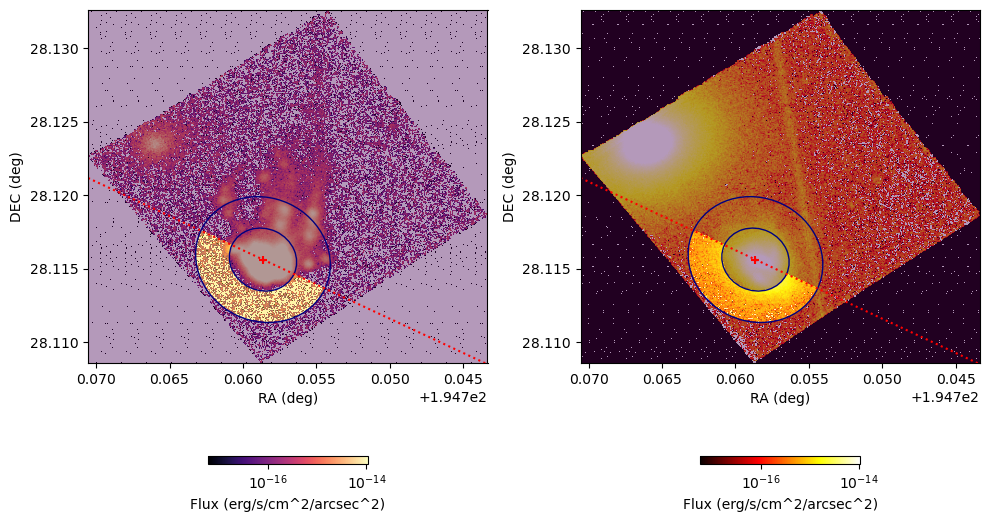

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(1, 2, figsize=(10, 10))  # Adjust the size for better appearance
ax = ax.flatten()

# Define color normalization for logarithmic scaling
norm = LogNorm(np.nanquantile(integrated_Ha[integrated_Ha>0], 0.01), vmax=np.nanquantile(integrated_Ha, 0.99))

# Plotting the integrated Ha
cmap = plt.cm.magma
cmap.set_bad(color='white')
im0 = ax[0].imshow(integrated_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap=cmap, norm=norm)
ax[0].set_xlabel("RA (deg)")  # Label for X-axis
ax[0].set_ylabel("DEC (deg)")  # Label for Y-axis

# Plotting the integrated continuum near Ha
im1 = ax[1].imshow(integrated_continuum_near_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='hot', norm=norm)
ax[1].set_xlabel("RA (deg)")  # Label for X-axis
ax[1].set_ylabel("DEC (deg)")  # Label for Y-axis

cbar0 = fig.colorbar(im0, ax=ax[0], location='bottom', shrink=0.4, pad = 0.1)
cbar1 = fig.colorbar(im1, ax=ax[1], location='bottom', shrink=0.4, pad = 0.1)

cbar0.set_label("Flux (erg/s/cm^2/arcsec^2)")  
cbar1.set_label("Flux (erg/s/cm^2/arcsec^2)")  

# Create ellipses and add them to the plot
for i in range(1, n):
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    
    for k in range(2):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='navy', facecolor='none')
        ax[k].add_patch(ellipse)
        #x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        #y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        #ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='navy')

ax[0].scatter(center[0], center[1], marker='+', c='red')
ax[1].scatter(center[0], center[1], marker='+', c='red')
ax[0].plot(x,y_semi,linestyle=':',c='red')
ax[1].plot(x,y_semi,linestyle=':',c='red')


ax[0].imshow(masks[1], extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', interpolation='none', alpha=0.4) #cmap=cmaps[i-1]
ax[1].imshow(masks[1], extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', interpolation='none', alpha=0.4) #cmap=cmaps[i-1]

for k in range(2):
    ax[k].set_xlim(ra_min,ra_max)
    ax[k].set_ylim(dec_min,dec_max)
    #ax[k].set_xlim(194.5+0.03,194.5+0.022)
    #ax[k].set_ylim(28.235,28.243)
    #ax[k].grid()


# Adjusting layout to make it fit better
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the tight_layout to leave space for colorbars
plt.show()


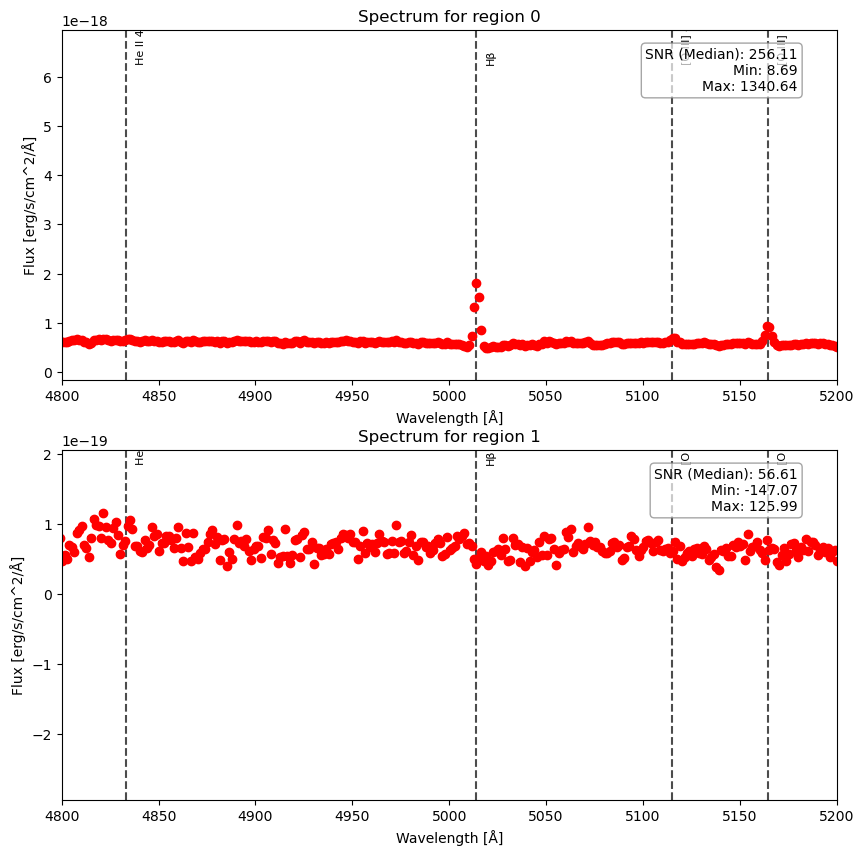

In [27]:
fig,ax= plt.subplots(2,1,figsize=(10,10))
ax = ax.flatten()

for i,mask in enumerate(masks):
    n = len(mask[mask==True])
    # Sum the spectra for the region defined by the mask (sum over the spatial axes)
    spectra_region = np.nansum(cube[:, mask], axis=1) / n
    var_region = np.nansum(var[:, mask], axis=1) / n**2
    ax[i].errorbar(w, spectra_region * cube_units, yerr=np.sqrt(var_region * var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5)

    snr = spectra_region / np.sqrt(var_region)
    #ax[i].plot(w,snr)
    snr_median = np.nanmedian(snr)
    snr_min = np.nanmin(snr)
    snr_max = np.nanmax(snr)
    
    # Add text to the upper right of the plot
    ax[i].text(
        0.95, 0.95, 
        f"SNR (Median): {snr_median:.2f}\nMin: {snr_min:.2f}\nMax: {snr_max:.2f}",
        ha='right', va='top', 
        transform=ax[i].transAxes, 
        fontsize=10, bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white', alpha=0.7)
    )

    
    for name, wavelength in redshifted_lines.items():
        ax[i].axvline(wavelength, color="black", linestyle="dashed", alpha=0.7)

        y_max = ax[i].get_ylim()[1]
        ax[i].text(wavelength + 5, y_max * 0.9, name, 
                   rotation=90, verticalalignment="bottom", fontsize=8, zorder=1, clip_on=True)
    
    #ax[i].set_xlim(6600,7800)
    ax[i].set_xlim(4800,5200)
    ax[i].set_xlabel("Wavelength [Å]")
    ax[i].set_ylabel("Flux [erg/s/cm^2/Å]")
    ax[i].set_title(f"Spectrum for region {i:.0f}")


#ax[3].set_ylim(0,1e-19)

# GALEX

In [9]:
from astropy.io import fits
import numpy as np

# Near UV

with fits.open("DATA/Coma_coadd-int_nuv.fits") as hdul:
    hdul.info()  # Shows a summary of the FITS file

    print('\n')
    header = hdul[0].header
    for card in header.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")  

    image_nuv = hdul[0].data

# Far UV

with fits.open("DATA/Coma_coadd-int_fuv.fits") as hdul:
    #hdul.info()  # Shows a summary of the FITS file
    image_fuv = hdul[0].data


Filename: DATA/Coma_coadd-int_nuv.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   (10750, 9900)   float32   


SIMPLE   = True / file does conform to FITS standard
BITPIX   = -32 / number of bits per data pixel
NAXIS    = 2 / number of data axes
NAXIS1   = 10750 / length of data axis 1
NAXIS2   = 9900 / length of data axis 2
EXTEND   = True / FITS dataset may contain extensions
COMMENT  =   FITS (Flexible Image Transport System) format is defined in 'Astronomy / 
COMMENT  =   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H / 
EQUINOX  = 2000.0 / Mean equinox
RADESYS  = ICRS / Astrometric system
CTYPE1   = RA---TAN / WCS projection type for this axis
CUNIT1   = deg / Axis unit
CRVAL1   = 195.0540528935 / World coordinate on this axis
CRPIX1   = 5375.5 / Reference pixel on this axis
CD1_1    = -0.000416666676756 / Linear projection matrix
CD1_2    = 0.0 / Linear projection matrix
CTYPE2   = DEC--TAN / WCS 

In [10]:
from astropy.wcs import WCS

# The WCS (World Coordinate System) transformation used in FITS files is not just a simple linear transformation.
# It typically involves a gnomonic (tangential) projection combined with a linear transformation matrix. 
# Intermediate coordinates in degrees applying the linear transformation defined by CD_i_j
# Then converting to ra and dec with the tangential projection formula

# . Why Use WCS Instead of a Simple Linear Equation?
# Corrects for distortion: The TAN projection accounts for sky curvature.
# Handles rotation: The CD matrix allows for rotated images.
# More accurate for large images: Your 10750 × 9900 pixel image covers a large sky area, so a simple linear transformation would introduce errors.


wcs_dict = {
    'CTYPE1': 'RA---TAN', 'CUNIT1': 'deg', 'CRVAL1': 195.0540528935, 
    'CRPIX1': 5375.5, 'CD1_1': -0.000416666676756, 'CD1_2': 0.0,
    'CTYPE2': 'DEC--TAN', 'CUNIT2': 'deg', 'CRVAL2': 27.86143255741, 
    'CRPIX2': 4950.5, 'CD2_1': 0.0, 'CD2_2': 0.000416666676756
}

wcs = WCS(wcs_dict)


In [11]:
ra_min_cut = 194.77055046736717 
ra_max_cut = 194.74333834551476

dec_min_cut = 28.108564306290965
dec_max_cut = 28.132619924965475

x_min_cut,y_min_cut = wcs.all_world2pix([[ra_min_cut,dec_min_cut]], 0)[0]
x_max_cut,y_max_cut = wcs.all_world2pix([[ra_max_cut,dec_max_cut]], 0)[0]

#print(x_min_cut,x_max_cut)
#print(y_min_cut,y_max_cut)

image_nuv_cut = image_nuv[int(y_min_cut):int(y_max_cut),int(x_min_cut):int(x_max_cut)]
image_fuv_cut = image_fuv[int(y_min_cut):int(y_max_cut),int(x_min_cut):int(x_max_cut)]

In [12]:
# Create regions

import matplotlib.path as mpath

# Ellipses
center = (194.758633, 28.115619)  # Center of the galaxy (reference coordinates)
angle = + 25                      # Angle of tilt in degrees

x = np.linspace(ra_min_cut,ra_max_cut,image_nuv_cut.shape[1])
m_semimajor_axis = np.tan(np.radians(angle))
y_semi =  m_semimajor_axis * (x - center[0]) + center[1]

e = np.sqrt(1-0.9**2)
width = 0.0023333333333333353
n = 3

# Generate the coordinate grid
y_coords, x_coords = np.meshgrid(np.linspace(dec_min_cut, dec_max_cut, image_nuv_cut.shape[0]),
                                 np.linspace(ra_min_cut, ra_max_cut, image_nuv_cut.shape[1]),
                                 indexing='ij')

down_mask = (y_coords < y_semi)

points = np.vstack((x_coords.ravel(), y_coords.ravel())).T

masks = []

for i in range(1, n):

    mask = np.zeros_like(image_nuv_cut, dtype=bool)
    
    # external ellipse
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   

    # Generate ellipse vertices
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)
    cos_angle, sin_angle = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    x_rot = ellipse_x * cos_angle - ellipse_y * sin_angle
    y_rot = ellipse_x * sin_angle + ellipse_y * cos_angle
    vertices_ext = np.column_stack([x_rot + center[0], y_rot + center[1]])

    # internal ellipse
    a = width * (i-1)                # semimajor axis
    b = a * np.sqrt(1-e**2)   

    # Generate ellipse vertices
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)
    cos_angle, sin_angle = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    x_rot = ellipse_x * cos_angle - ellipse_y * sin_angle
    y_rot = ellipse_x * sin_angle + ellipse_y * cos_angle
    vertices_int = np.column_stack([x_rot + center[0], y_rot + center[1]])

    # Create paths for the ellipses
    path_ext = mpath.Path(vertices_ext)
    path_int = mpath.Path(vertices_int)

    # Mask points within the external but outside the internal ellipse
    mask_ext = path_ext.contains_points(points).reshape(mask.shape)
    mask_int = path_int.contains_points(points).reshape(mask.shape)
    
    mask |= (mask_ext & ~mask_int & down_mask)
    
    masks.append(mask)
    

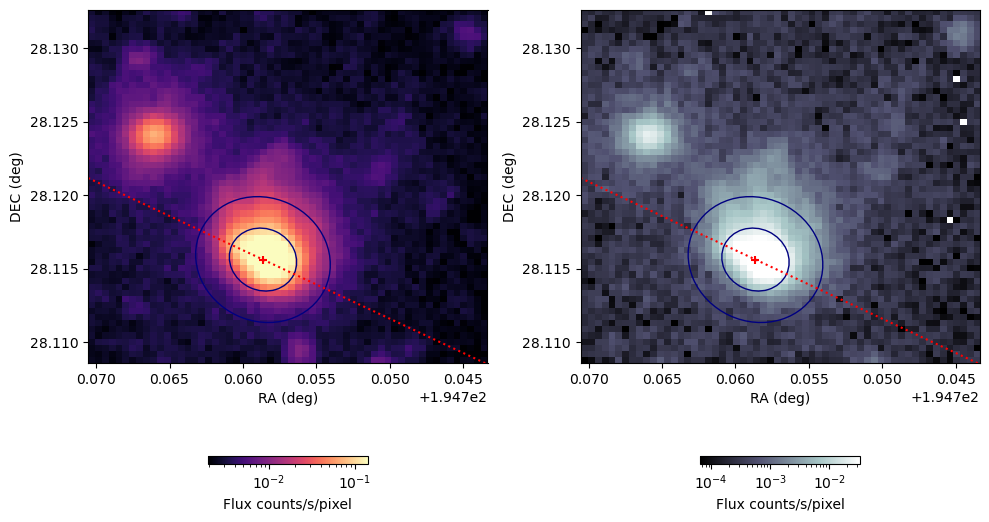

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(1, 2, figsize=(10, 10))  # Adjust the size for better appearance
ax = ax.flatten()


norm = LogNorm(np.nanquantile(image_nuv_cut[image_nuv_cut>0], 0.01), vmax=np.nanquantile(image_nuv_cut, 0.99))

# nuv
im0 = ax[0].imshow(image_nuv_cut, origin='lower', extent=[ra_min_cut, ra_max_cut, dec_min_cut, dec_max_cut], cmap='magma', norm=norm) 
ax[0].set_xlabel("RA (deg)")  
ax[0].set_ylabel("DEC (deg)")  

# fuv
norm = LogNorm(np.nanquantile(image_fuv_cut[image_fuv_cut>0], 0.01), vmax=np.nanquantile(image_fuv_cut, 0.99))
im1 = ax[1].imshow(image_fuv_cut, origin='lower', extent=[ra_min_cut, ra_max_cut, dec_min_cut, dec_max_cut], cmap='bone', norm=norm)
ax[1].set_xlabel("RA (deg)")  
ax[1].set_ylabel("DEC (deg)")  

cbar0 = fig.colorbar(im0, ax=ax[0], location='bottom', shrink=0.4, pad = 0.1)
cbar1 = fig.colorbar(im1, ax=ax[1], location='bottom', shrink=0.4, pad = 0.1)

cbar0.set_label("Flux counts/s/pixel")  
cbar1.set_label("Flux counts/s/pixel")  

######

# Create ellipses and add them to the plot
for i in range(1, n):
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    
    for k in range(2):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='navy', facecolor='none')
        ax[k].add_patch(ellipse)
        #x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        #y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        #ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='navy')


ax[0].scatter(center[0], center[1], marker='+', c='red')
ax[1].scatter(center[0], center[1], marker='+', c='red')
ax[0].plot(x,y_semi,linestyle=':',c='red')
ax[1].plot(x,y_semi,linestyle=':',c='red')


#ax[0].imshow(masks[1], extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', interpolation='none', alpha=0.4) #cmap=cmaps[i-1]
#ax[1].imshow(masks[1], extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', interpolation='none', alpha=0.4) #cmap=cmaps[i-1]

for k in range(2):
    ax[k].set_xlim(ra_min_cut,ra_max_cut)
    ax[k].set_ylim(dec_min_cut,dec_max_cut)
    #ax[k].set_xlim(194.5+0.03,194.5+0.022)
    #ax[k].set_ylim(28.235,28.243)
    #ax[k].grid()


# Adjusting layout to make it fit better
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the tight_layout to leave space for colorbars
plt.show()

plt.show()



In [37]:
for i,mask in enumerate(masks):
    n = len(mask[mask==True])
    print(n)
    # Sum the spectra for the region defined by the mask (sum over the spatial axes)
    nuv_phot_point_region = np.nansum(image_nuv_cut[mask]) / n
    print(nuv_phot_point_region)
    fuv_phot_point_region = np.nansum(image_fuv_cut[mask]) / n
    print(fuv_phot_point_region)
    #var_region = np.nansum(var[:, mask], axis=1) / n**2
    #ax[i].errorbar(w, spectra_region * cube_units, yerr=np.sqrt(var_region * var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5)


39
0.11778738559820713
0.0275194064164773
116
0.01297615622651988
0.0020351110604302637


# HST

In [15]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np


with fits.open("DATA/NGC_4858/NGC-4858-F600LP_drc.fits") as hdul:
    hdul.info()  # Shows a summary of the FITS file

    print('\n')
    header = hdul[1].header
    for card in header.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")  

    image_600LP = hdul[1].data

print("\n")

# Open the FITS file
with fits.open("DATA/NGC_4858/NGC-4858-F350LP_drc.fits") as hdul:
    # Print information about the file structure
    hdul.info()
    
    print('\n')
    header = hdul[1].header
    for card in header.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")  
    
    # Read the table from HDU 4 (HDRTAB)
    #hdrtab_data = Table(hdul[4].data)  # Convert to Astropy Table for easy manipulation

    image_350LP = hdul[1].data

Filename: DATA/NGC_4858/NGC-4858-F600LP_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     921   ()      
  1  SCI           1 ImageHDU        95   (5699, 5850)   float32   
  2  WHT           1 ImageHDU        45   (5699, 5850)   float32   
  3  CTX           1 ImageHDU        38   ()      
  4  HDRTAB        1 BinTableHDU    559   8R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 9A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 19A, 4A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 9A, 18A, 3A, K, 6A, 4A, D, 13A, 8A, 4A, 3A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A, 7A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D,

In [16]:
conversion_factor_600LP = 8.737086975e-20 # from e/s to erg/s/cm^2/angstrom
pivot_wavelength_600LP = 7460.8884 
bandwidth_600LP = 941.496155

conversion_factor_350LP = 5.1933534e-20 # from e/s to erg/s/cm^2/angstrom
pivot_wavelength_350LP = 5862.50925
bandwidth_350LP = 1486.5384

wcs_dict = {
    'CTYPE1': 'RA---TAN', 'CUNIT1': 'deg', 'CRVAL1': 194.7592093633629, 
    'CRPIX1': 2849.508861959989, 'CD1_1':  -1.0833333333333e-05 , 'CD1_2': 0.0,
    'CTYPE2': 'DEC--TAN', 'CUNIT2': 'deg', 'CRVAL2': 28.12969769687284, 
    'CRPIX2': 2924.819673470961, 'CD2_1': 0.0, 'CD2_2': 1.08333333333336e-05
}

wcs = WCS(wcs_dict)

naxis1, naxis2 = 5699, 5850

ra_min, dec_min = wcs.all_pix2world([[0, 0]], 0)[0]
ra_max, dec_max = wcs.all_pix2world([[naxis1, naxis2]], 0)[0]

In [18]:
# Create regions

import matplotlib.path as mpath

# Ellipses
center = (194.758633, 28.115619)  # Center of the galaxy (reference coordinates)
angle = + 25                      # Angle of tilt in degrees

x = np.linspace(ra_min,ra_max,image_600LP.shape[1])
m_semimajor_axis = np.tan(np.radians(angle))
y_semi =  m_semimajor_axis * (x - center[0]) + center[1]

e = np.sqrt(1-0.9**2)
width = 0.0023333333333333353
n = 3

# Generate the coordinate grid
y_coords, x_coords = np.meshgrid(np.linspace(dec_min, dec_max, naxis2),
                                 np.linspace(ra_min, ra_max, naxis1),
                                 indexing='ij')

down_mask = (y_coords < y_semi)

points = np.vstack((x_coords.ravel(), y_coords.ravel())).T

masks = []

for i in range(1, n):

    mask = np.zeros_like(image_600LP, dtype=bool)
    
    # external ellipse
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   

    # Generate ellipse vertices
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)
    cos_angle, sin_angle = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    x_rot = ellipse_x * cos_angle - ellipse_y * sin_angle
    y_rot = ellipse_x * sin_angle + ellipse_y * cos_angle
    vertices_ext = np.column_stack([x_rot + center[0], y_rot + center[1]])

    # internal ellipse
    a = width * (i-1)                # semimajor axis
    b = a * np.sqrt(1-e**2)   

    # Generate ellipse vertices
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)
    cos_angle, sin_angle = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    x_rot = ellipse_x * cos_angle - ellipse_y * sin_angle
    y_rot = ellipse_x * sin_angle + ellipse_y * cos_angle
    vertices_int = np.column_stack([x_rot + center[0], y_rot + center[1]])

    # Create paths for the ellipses
    path_ext = mpath.Path(vertices_ext)
    path_int = mpath.Path(vertices_int)

    # Mask points within the external but outside the internal ellipse
    mask_ext = path_ext.contains_points(points).reshape(mask.shape)
    mask_int = path_int.contains_points(points).reshape(mask.shape)
    
    mask |= (mask_ext & ~mask_int & down_mask)
    
    masks.append(mask)

In [19]:
units_600LP = conversion_factor_600LP / ( 1.0833333333333e-05 * 3600 )**2
units_350LP = conversion_factor_350LP / ( 1.0833333333333e-05 * 3600 )**2

image_600LP_phys = image_600LP * units_600LP
image_350LP_phys = image_350LP * units_350LP

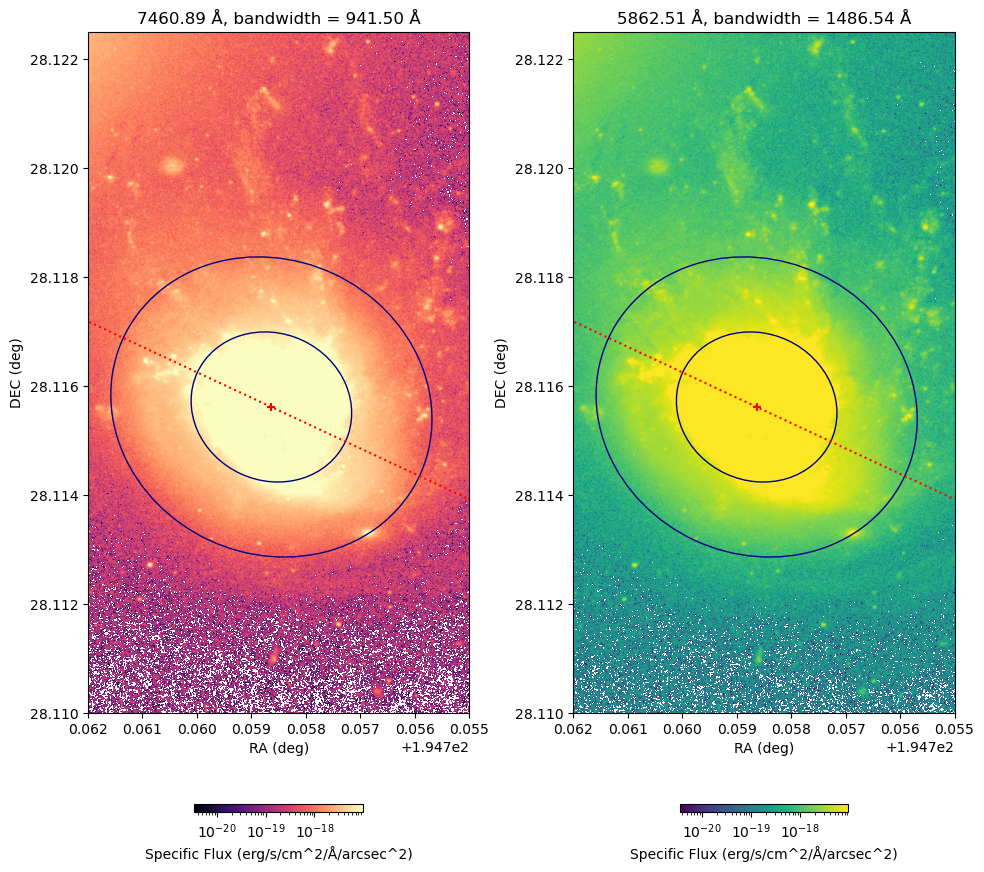

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(1, 2, figsize=(10, 10))  
ax = ax.flatten()

norm = LogNorm(np.nanquantile(image_600LP_phys[image_600LP_phys>0], 0.01), vmax=np.nanquantile(image_600LP_phys, 0.99))

cmap = plt.cm.magma
cmap.set_bad(color='white')
im0 = ax[0].imshow(image_600LP_phys, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap=cmap, norm=norm)
ax[0].set_title(f"{pivot_wavelength_600LP:.2f} Å, bandwidth = {bandwidth_600LP:.2f} Å")
ax[0].set_xlabel("RA (deg)") 
ax[0].set_ylabel("DEC (deg)")  

norm = LogNorm(np.nanquantile(image_350LP_phys[image_350LP_phys>0], 0.01), vmax=np.nanquantile(image_350LP_phys, 0.99))
cmap = plt.cm.viridis
im1 = ax[1].imshow(image_350LP_phys, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap=cmap, norm=norm)
ax[1].set_title(f"{pivot_wavelength_350LP:.2f} Å, bandwidth = {bandwidth_350LP:.2f} Å")
ax[1].set_xlabel("RA (deg)") 
ax[1].set_ylabel("DEC (deg)")  

cbar0 = fig.colorbar(im0, ax=ax[0], location='bottom', shrink=0.4, pad = 0.1)
cbar1 = fig.colorbar(im1, ax=ax[1], location='bottom', shrink=0.4, pad = 0.1)

cbar0.set_label("Specific Flux (erg/s/cm^2/Å/arcsec^2)")  
cbar1.set_label("Specific Flux (erg/s/cm^2/Å/arcsec^2)")  

# Create ellipses and add them to the plot
for i in range(1, n):
    a = 0.0015 * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    
    for k in range(2):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='navy', facecolor='none')
        ax[k].add_patch(ellipse)
        #x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        #y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        #ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='navy')

ax[0].scatter(center[0], center[1], marker='+', c='red')
ax[1].scatter(center[0], center[1], marker='+', c='red')
ax[0].plot(x,y_semi,linestyle=':',c='red')
ax[1].plot(x,y_semi,linestyle=':',c='red')


#ax[0].imshow(masks[2], extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', interpolation='none', alpha=0.4) #cmap=cmaps[i-1]
#ax[1].imshow(masks[2], extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', interpolation='none', alpha=0.4) #cmap=cmaps[i-1]

for k in range(2):
    #ax[k].set_xlim(ra_min,ra_max)
    #ax[k].set_ylim(dec_min,dec_max)
    ax[k].set_xlim(194.7+0.062,194.7+0.055)
    ax[k].set_ylim(28.11,28.1225)
    #ax[k].grid()


# Adjusting layout to make it fit better
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the tight_layout to leave space for colorbars
plt.show()

In [44]:
from astropy.io import fits

# Open the FITS file
with fits.open("DATA/ALMA/NGC4858_12m+7m_co21_crop_mom0.fits") as hdul:
    hdul.info()
    # Access the primary HDU
    data = hdul[0].data
    
    # Access the DATA HDU
    #data_hdu = hdul[1]
    #data = data_hdu.data  # 3D data cube
    #data_header = data_hdu.header  # Metadata for the DATA HDU

Filename: DATA/ALMA/NGC4858_12m+7m_co21_crop_mom0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     137   (308, 486)   float32   


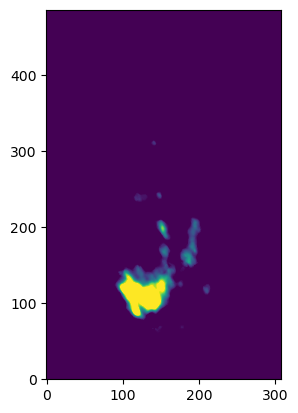

In [46]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(data,origin='lower',clim=np.quantile(data,[0.01,0.99]))